In [19]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
# Load the dataset
df = pd.read_csv('realtor-data.zip.csv')

In [22]:
df['prev_sold_date'] = df['prev_sold_date'].astype(str).str.strip()

# Convert 'prev_sold_date' to datetime
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

# Extract the year from 'prev_sold_date'
df['year_sold'] = df['prev_sold_date'].dt.year

# Filter data based on 'San Diego' and 'California'
filtered_df = df[(df['city'] == 'San Diego') & (df['state'] == 'California')]

# Ensure that the 'prev_sold_date' is not NaN
filtered_df = filtered_df[filtered_df['prev_sold_date'].notna()]
filtered_df = filtered_df[filtered_df['house_size'].notna()]
filtered_df = filtered_df[filtered_df['house_size'] > 0]
filtered_df = filtered_df[filtered_df['bed'].notna()]
filtered_df['price_per_sqft'] = filtered_df['price'] / filtered_df['house_size']


#cleaning for bed visualization
filtered_df = filtered_df[filtered_df['bed'].notna()]
# Ensure 'bed' column is numeric
filtered_df['bed'] = pd.to_numeric(filtered_df['bed'], errors='coerce')
# Drop rows where 'bed' is NaN or invalid after conversion
filtered_df = filtered_df[filtered_df['bed'].notna()]
# Group by number of bedrooms and calculate the average price per square foot
average_price_by_bedrooms = filtered_df.groupby('bed')['price_per_sqft'].mean().reset_index()
average_price_by_bedrooms.columns = ['Number of Bedrooms', 'Average Price per Sq Ft']

#cleaning for bathroom visualization
filtered_df = filtered_df[filtered_df['bath'].notna()]
# Ensure 'bed' column is numeric
filtered_df['bath'] = pd.to_numeric(filtered_df['bath'], errors='coerce')
# Drop rows where 'bed' is NaN or invalid after conversion
filtered_df = filtered_df[filtered_df['bath'].notna()]
# Group by number of bedrooms and calculate the average price per square foot
average_price_by_bedrooms = filtered_df.groupby('bath')['price_per_sqft'].mean().reset_index()

# Rename columns for clarity
average_price_by_bedrooms.columns = ['Number of Bathrooms', 'Average Price per Sq Ft']

# Save the filtered data with the new 'year_sold' column
filtered_df.to_csv('filtered_data.csv', index=False)

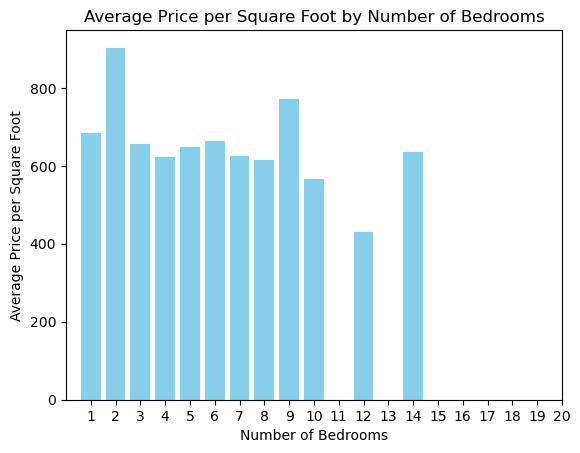

In [32]:
#bedroom visualization

average_price_by_bedrooms.columns = ['Number of Bedrooms', 'Average Price per Sq Ft']
average_price_by_bedrooms = filtered_df.groupby('bed')['price_per_sqft'].mean().reset_index()
average_price_by_bedrooms.columns = ['Number of Bedrooms', 'Average Price per Sq Ft']

plt.bar(average_price_by_bedrooms['Number of Bedrooms'], 
        average_price_by_bedrooms['Average Price per Sq Ft'], 
        color='skyblue')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price per Square Foot')
plt.title('Average Price per Square Foot by Number of Bedrooms')

# Set x-axis ticks dynamically
x_ticks = range(int(average_price_by_bedrooms['Number of Bedrooms'].min()), 
                int(average_price_by_bedrooms['Number of Bedrooms'].max()) + 1)
plt.xticks(ticks=x_ticks)
plt.xlim(0, 20)  # Adjust x-axis limit if needed
plt.show()

C:\Users\ahjbr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ahjbr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


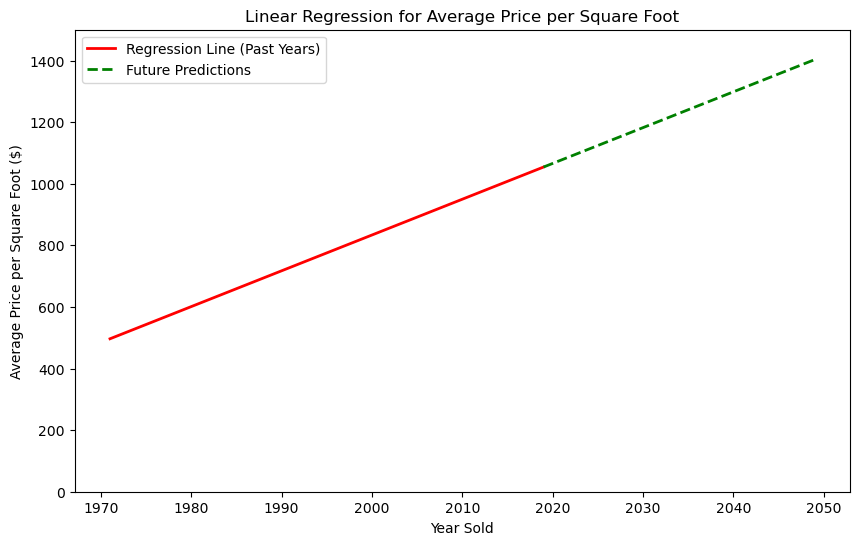